<a id = 'header'></a>

# 0.0 Import Libraries
___

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# import warnings
# warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use('ggplot')

# 0.5 General Function
___

In [2]:
def outlier_plot(df , var):
    df[var].plot()

<a id = 'content_page'><a/>
# 1.0 Exploring Datasets
___

* [1.1 Dataset Overview](section_1.1)
* [1.2 Dataset Dictionary](section_1.2)    
* [1.3 Exploring Null Values](#section_1.3)
* [1.4 Exploring Outliers](#section_1.4)
* [1.5 Visualing Dataset](#section_1.5)

In [3]:
# Import Dataset
df_user=pd.read_csv('Mini_project_2_Data.csv')
df_user.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
df_user.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


<a id = 'section_1.1'><a/>
### 1.1 Dataset Overview
[(Back to Top)](#content_page)
___

In [6]:
print('DF Shape shape: ' , df_user.shape)
print('DF ndim: ' , df_user.ndim)
print('DF size: ' , df_user.size)

DF Shape shape:  (90189, 5)
DF ndim:  2
DF size:  450945


<a id = 'section_1.2'><a/>
### 1.2 Data Dictionary
[(Back to Top)](#content_page)    
___

| Variables | Variables Description |
|---|---|
| userid | a unique number that identifies each player |
| version | whether the player was put in the control group A (level 30) or test group B (level 40)  |
| sum_gamerounds | the number of game rounds played by the player during 1st week of installation |
| retention_1 | did the player come back and play 1 day after installing? |
| retention_7 | did the player come back and play 7 day after installing? |

<a id = 'section_1.3'><a/>
### 1.3 Exploring Null Value
[(Back to Top)](#content_page)
___
- No Null Value observed from Dataset.

In [7]:
df_user.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

<a id = 'section_1.4'><a/>
### 1.4 Checking for Outliers
[(Back to Top)](#content_page)
___
- No Null Value observed from Dataset.

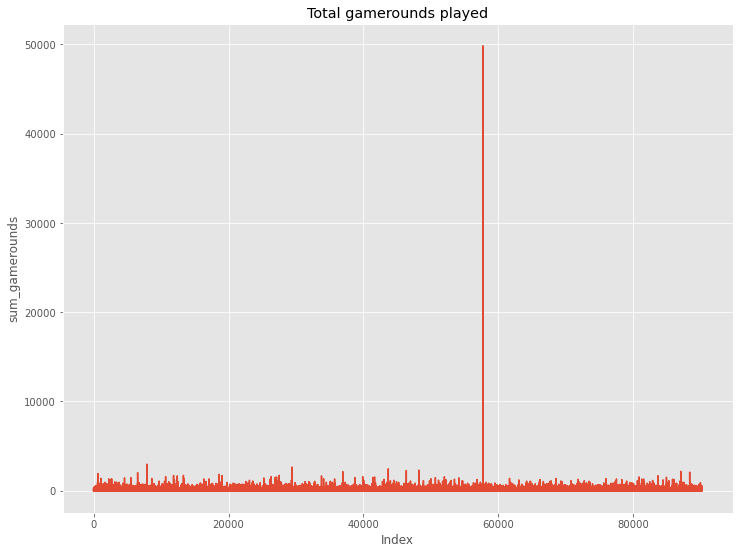

In [8]:
df_user['sum_gamerounds'].plot(figsize = (12,9))

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds");

In [9]:
# Locating Outlier for sum_gamerounds
# There is only 1 observed values more than 3000 game rounds.
df_user[['sum_gamerounds']].sort_values(by = 'sum_gamerounds' , ascending = False).head()

,sum_gamerounds
57702,49854
7912,2961
29417,2640
43671,2438
48188,2294


In [10]:
print(f'DF before remove outlier: {df_user.shape}')
print(f'DF Max value for sum_gamerounds before removal : {df_user["sum_gamerounds"].max()}')
print('---------------------------------------------')

df_user = df_user[df_user['sum_gamerounds'] < 3000]

print(f'DF after remove outlier: {df_user.shape}')
print(f'DF Max value for sum_gamerounds after removal : {df_user["sum_gamerounds"].max()}')

DF before remove outlier: (90189, 5)
DF Max value for sum_gamerounds before removal : 49854
---------------------------------------------
DF after remove outlier: (90188, 5)
DF Max value for sum_gamerounds after removal : 2961


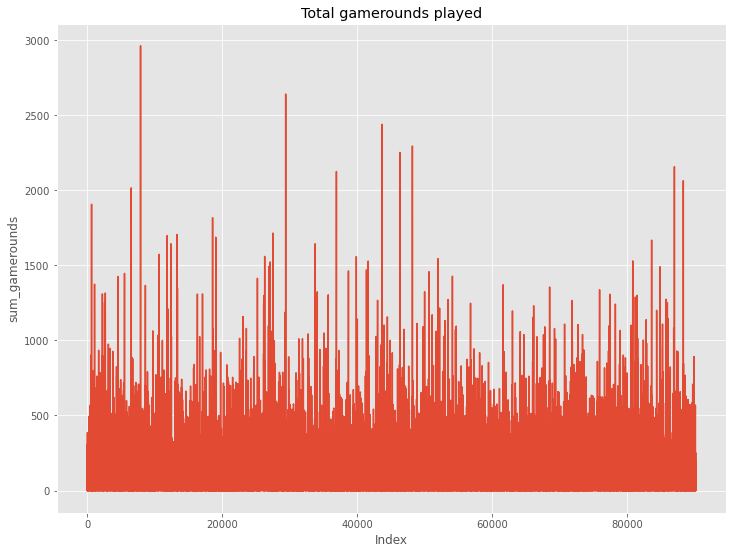

In [11]:
df_user['sum_gamerounds'].plot(figsize = (12,9))

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds");

In [25]:
group_A=pd.DataFrame(df_user[df_user.version=="gate_30"]['sum_gamerounds'])
group_B=pd.DataFrame(df_user[df_user.version=="gate_40"]['sum_gamerounds'])

In [26]:
group_A

,sum_gamerounds
0,3
1,38
6,0
11,0
13,39
...,...
90179,14
90180,7
90182,21
90183,10
